In [14]:
import pandas as pd
import numpy as np
from tqdm import tqdm

from collections import defaultdict

In [15]:
puzzle_data = pd.read_csv('/Users/shikharrastogi/Downloads/lichess_db_puzzle.csv')

In [16]:
puzzle_data['themes_list'] = puzzle_data.Themes.apply(lambda x: x.strip().split(' '))

In [17]:
# all_themes = set()
# for idx, row in puzzle_data.iterrows():
#     for t in row['themes_list']:
#         all_themes.add(t)

In [52]:
chess_theme_dict.keys()

dict_keys(['checkmate_patterns', 'tactical_themes', 'strategic_concepts', 'pawn_related_themes', 'piece_specific_endgames'])

In [18]:
chess_theme_dict = {
    "checkmate_patterns": {
        'anastasiaMate',
        'arabianMate',
        'backRankMate',
        'bodenMate',
        'doubleBishopMate',
        'dovetailMate',
        'hookMate',
        'smotheredMate'
    },
    # "checkmating_tactics": {
    #     'crushing',
    #     'mate',
    #     'mateIn1',
    #     'mateIn2',
    #     'mateIn3',
    #     'mateIn4',
    #     'mateIn5'
    # },
    "tactical_themes": {
        'capturingDefender',
        'deflection',
        'discoveredAttack',
        'doubleCheck',
        'fork',
        'hangingPiece',
        'pin',
        'skewer',
        'xRayAttack'
    },
    # "advanced_tactical_themes": {
    #     'attraction',
    #     'clearance',
    #     'interference',
    #     'intermezzo',
    #     'sacrifice'
    # },
    "strategic_concepts": {
        'advantage',
        'endgame',
        'equality',
        'middlegame',
        'opening'
    },
    "pawn_related_themes": {
        'advancedPawn',
        'enPassant',
        'pawnEndgame',
        'promotion',
        'underPromotion'
    },
    "piece_specific_endgames": {
        'bishopEndgame',
        'knightEndgame',
        'queenEndgame',
        'queenRookEndgame',
        'rookEndgame'
    },
    # "king_safety_and_attack": {
    #     'attackingF2F7',
    #     'exposedKing',
    #     'kingsideAttack',
    #     'queensideAttack'
    # },
    # "special_moves": {
    #     'castling',
    #     'quietMove'
    # },
    # "defensive_tactics": {
    #     'defensiveMove',
    #     'trappedPiece',
    #     'zugzwang'
    # },
    #Removing game length related puzzles names and skill level related 
    # "game_length": {
    #     'long',
    #     'veryLong',
    #     'short',
    #     'oneMove'
    # },
    # "player_skill_levels": {
    #     'master',
    #     'superGM',
    #     'masterVsMaster'
    # }
}


In [19]:
reversed_chess_theme_dict = {}

for key in chess_theme_dict:
    for value in chess_theme_dict[key]:
        reversed_chess_theme_dict[value] = key

In [20]:
puzzle_data['modified_theme_list'] = puzzle_data.themes_list.apply(lambda x: list(set([reversed_chess_theme_dict[y] for y in x if y in reversed_chess_theme_dict])))

In [21]:
puzzle_data.modified_theme_list

0                  [strategic_concepts, tactical_themes]
1                                   [strategic_concepts]
2          [strategic_concepts, piece_specific_endgames]
3                                   [strategic_concepts]
4              [strategic_concepts, pawn_related_themes]
                               ...                      
3764374                             [strategic_concepts]
3764375                             [strategic_concepts]
3764376                             [strategic_concepts]
3764377            [strategic_concepts, tactical_themes]
3764378                             [strategic_concepts]
Name: modified_theme_list, Length: 3764379, dtype: object

In [22]:
puzzle_data = puzzle_data.loc[(puzzle_data.Rating<=2000) & (puzzle_data.Rating>=1000)]

<Axes: >

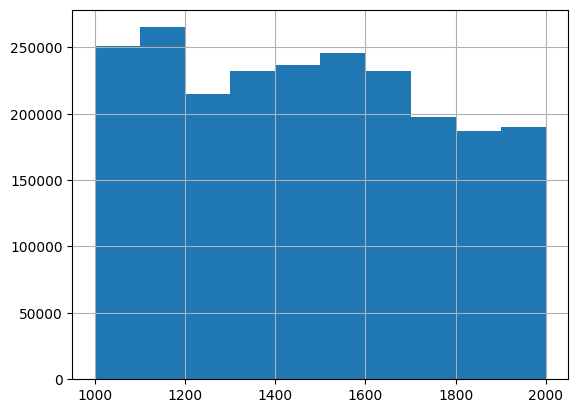

In [23]:
puzzle_data.Rating.hist()

In [24]:
puzzle_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2253112 entries, 0 to 3764378
Data columns (total 12 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   PuzzleId             object
 1   FEN                  object
 2   Moves                object
 3   Rating               int64 
 4   RatingDeviation      int64 
 5   Popularity           int64 
 6   NbPlays              int64 
 7   Themes               object
 8   GameUrl              object
 9   OpeningTags          object
 10  themes_list          object
 11  modified_theme_list  object
dtypes: int64(4), object(8)
memory usage: 223.5+ MB


In [27]:
def create_rating_bracket(row):
    assert(row >= 1000)
    if 1000<=row<1100:
        return '1000-1100'
    elif 1100<=row<1200:
        return '1100-1200'
    elif 1200<=row<1300:
        return '1200-1300'
    elif 1300<=row<1400:
        return '1300-1400'
    elif 1400<=row<1500:
        return '1400-1500'
    elif 1500<=row<1600:
        return '1500-1600'
    elif 1600<=row<1700:
        return '1600-1700'
    else:
        return 'gt1700'

In [28]:
puzzle_data['rating_bracket'] = puzzle_data.Rating.apply(create_rating_bracket)

In [29]:
puzzle_data_tmp = puzzle_data.explode('modified_theme_list')

In [30]:
#Verifying all puzzles of all ELO ratings have all different themes
puzzle_data_tmp.groupby('rating_bracket').agg({'modified_theme_list': ['nunique', 'unique']})

modified_theme_list  \
                           nunique   
rating_bracket                       
1000-1100                        5   
1100-1200                        5   
1200-1300                        5   
1300-1400                        5   
1400-1500                        5   
1500-1600                        5   
1600-1700                        5   
gt1700                           5   

                                                                   
                                                           unique  
rating_bracket                                                     
1000-1100       [strategic_concepts, tactical_themes, pawn_rel...  
1100-1200       [checkmate_patterns, strategic_concepts, tacti...  
1200-1300       [strategic_concepts, piece_specific_endgames, ...  
1300-1400       [strategic_concepts, tactical_themes, checkmat...  
1400-1500       [strategic_concepts, tactical_themes, piece_sp...  
1500-1600       [strategic_concepts, pawn_related_themes, tact...  
1600-1700       [strategic_concepts, piece_specific_endgames, ...  
gt1700          [strategic_concepts, tactical_themes, piece_sp...

In [50]:
np.sort(puzzle_data_tmp.rating_bracket.value_counts().index.values)

array(['1000-1100', '1100-1200', '1200-1300', '1300-1400', '1400-1500',
       '1500-1600', '1600-1700', 'gt1700'], dtype=object)

In [31]:
puzzle_rating_list = puzzle_data_tmp.rating_bracket.unique()

In [32]:
puzzle_theme_list = puzzle_data_tmp.modified_theme_list.unique()

In [33]:
#Checking if every (rating, theme) pair has enough puzzles - looks good
with pd.option_context('display.max_rows', None):
    display(puzzle_data_tmp.groupby(['rating_bracket', 'modified_theme_list']).agg({'PuzzleId': 'count'}))

PuzzleId
rating_bracket modified_theme_list              
1000-1100      checkmate_patterns          14297
               pawn_related_themes         13840
               piece_specific_endgames     19702
               strategic_concepts         251351
               tactical_themes            106965
1100-1200      checkmate_patterns          10075
               pawn_related_themes         16460
               piece_specific_endgames     20900
               strategic_concepts         265078
               tactical_themes            112662
1200-1300      checkmate_patterns           5897
               pawn_related_themes         14022
               piece_specific_endgames     16259
               strategic_concepts         215098
               tactical_themes             90749
1300-1400      checkmate_patterns           7017
               pawn_related_themes         15140
               piece_specific_endgames     16107
               strategic_concepts         232077
               tactical_themes             95950
1400-1500      checkmate_patterns           4883
               pawn_related_themes         15790
               piece_specific_endgames     15718
               strategic_concepts         236889
               tactical_themes             92874
1500-1600      checkmate_patterns           3322
               pawn_related_themes         17285
               piece_specific_endgames     15839
               strategic_concepts         244351
               tactical_themes             94790
1600-1700      checkmate_patterns           1952
               pawn_related_themes         17432
               piece_specific_endgames     15597
               strategic_concepts         232241
               tactical_themes             85480
gt1700         checkmate_patterns           2631
               pawn_related_themes         51395
               piece_specific_endgames     41676
               strategic_concepts         574748
               tactical_themes            197324

In [34]:
puzzle_bank = puzzle_data_tmp.groupby(['rating_bracket', 'modified_theme_list']).agg({'PuzzleId': 'unique'})

In [35]:
action_space = puzzle_bank.index.values #Tuple of rating bracket, theme name

In [36]:
np.save('action_space_small.npy', action_space)

In [53]:
import random

action_space = np.load('action_space_small.npy', allow_pickle=True)
a = random.choice(action_space)


In [55]:
action_space

array([('1000-1100', 'checkmate_patterns'),
       ('1000-1100', 'pawn_related_themes'),
       ('1000-1100', 'piece_specific_endgames'),
       ('1000-1100', 'strategic_concepts'),
       ('1000-1100', 'tactical_themes'),
       ('1100-1200', 'checkmate_patterns'),
       ('1100-1200', 'pawn_related_themes'),
       ('1100-1200', 'piece_specific_endgames'),
       ('1100-1200', 'strategic_concepts'),
       ('1100-1200', 'tactical_themes'),
       ('1200-1300', 'checkmate_patterns'),
       ('1200-1300', 'pawn_related_themes'),
       ('1200-1300', 'piece_specific_endgames'),
       ('1200-1300', 'strategic_concepts'),
       ('1200-1300', 'tactical_themes'),
       ('1300-1400', 'checkmate_patterns'),
       ('1300-1400', 'pawn_related_themes'),
       ('1300-1400', 'piece_specific_endgames'),
       ('1300-1400', 'strategic_concepts'),
       ('1300-1400', 'tactical_themes'),
       ('1400-1500', 'checkmate_patterns'),
       ('1400-1500', 'pawn_related_themes'),
       ('1400-1500'

In [54]:
len(action_space)

40

In [40]:
random.choice(puzzle_bank.loc[a].PuzzleId)

'83h1n'

In [41]:
puzzle_bank.to_csv('puzzle_bank_small.csv')

In [46]:
puzzle_bank.to_pickle('puzzle_bank_small.pkl')

In [42]:
puzzle_data.loc[puzzle_data.PuzzleId=='zPzrm']['FEN'].values[0]

'8/pk3r2/1p6/4n3/5RPp/PP5P/2P2K2/8 w - - 0 38'

In [43]:
class PuzzleBank:
    def __init__(self):
        self.lichess_data = pd.read_csv('/Users/shikharrastogi/Downloads/lichess_db_puzzle.csv')
        self.bank = pd.read_csv('puzzle_bank.csv')
    
    def get_puzzle(self, puzzleId):
        return self.lichess_data.loc[self.lichess_data.PuzzleId==puzzleId]
    
    #TODO: This should go into the Environment class, which calls the PuzzleBank get_puzzle method
    def get_next_state(self, action):
        puzzleId = random.choice(puzzle_bank.loc[action].PuzzleId)
        return self._get_puzzle(puzzleId)['FEN'].values[0]

In [44]:
class TutorAgent:
    def __init__(
        self,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float = 0.95,
    ):
        """Initialize a Reinforcement Learning agent with an empty dictionary
        of state-action values (q_values), a learning rate and an epsilon.

        Args:
            learning_rate: The learning rate
            initial_epsilon: The initial epsilon value
            epsilon_decay: The decay for epsilon
            final_epsilon: The final epsilon value
            discount_factor: The discount factor for computing the Q-value
        """
        self.action_space = np.load('action_space.npy', allow_pickle=True)
        self.q_values = defaultdict(lambda: np.zeros(len(self.action_space)))

        self.lr = learning_rate
        self.discount_factor = discount_factor

        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        self.training_error = []

    def get_action(self, obs: tuple[int, int, bool]) -> int:
        """
        Returns the best action with probability (1 - epsilon)
        otherwise a random action with probability epsilon to ensure exploration.
        """
        # with probability epsilon return a random action to explore the environment
        if np.random.random() < self.epsilon:
            return random.choice(self.action_space)

        # with probability (1 - epsilon) act greedily (exploit)
        else:
            return int(np.argmax(self.q_values[obs]))

    def update(
        self,
        obs: tuple[int, int, bool],
        action: int,
        reward: float,
        terminated: bool,
        next_obs: tuple[int, int, bool],
    ):
        """Updates the Q-value of an action."""
        future_q_value = (not terminated) * np.max(self.q_values[next_obs])
        temporal_difference = (
            reward + self.discount_factor * future_q_value - self.q_values[obs]
        )

        self.q_values[obs][action] = (
            self.q_values[obs][action] + self.lr * temporal_difference
        )
        self.training_error.append(temporal_difference)

    def decay_epsilon(self):
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)

In [162]:
# Hyperparameters
learning_rate = 0.01
n_episodes = 100_000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # Reduce the exploration over time
final_epsilon = 0.1

agent = TutorAgent(
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

In [ ]:
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    # Play one episode
    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        # Update the agent
        agent.update(obs, action, reward, terminated, next_obs)

        # Update the current observation, and whether the environment is done
        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()